In [ ]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/ .kaggle/


cp: -r not specified; omitting directory '/root/'


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:04<00:00, 270MB/s]
100% 1.06G/1.06G [00:05<00:00, 228MB/s]


In [ ]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validate_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#  Normalize
def process(image, label):
  image =tf.cast(image/255. ,tf.float32)
  return image, label

  train_ds = train_ds.map(process)
  validate_ds = validate_ds.map(process)


In [ ]:
#Create Cnn Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid', activation='relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [ ]:
 history = model.fit(train_ds,epochs=10,validation_data=validate_ds)

Epoch 1/10
625/625 [==============================] - 70s 108ms/step - loss: 1.0078 - accuracy: 0.6524 - val_loss: 0.5674 - val_accuracy: 0.7124
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5513 - accuracy: 0.7366 - val_loss: 1.1618 - val_accuracy: 0.6090
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4303 - accuracy: 0.8025 - val_loss: 0.5313 - val_accuracy: 0.7542
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3577 - accuracy: 0.8419 - val_loss: 0.5160 - val_accuracy: 0.7474
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2766 - accuracy: 0.8853 - val_loss: 0.4883 - val_accuracy: 0.7988
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2052 - accuracy: 0.9151 - val_loss: 0.5712 - val_accuracy: 0.7678
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1421 - accuracy: 0.9438 - val_loss: 0.5424 - val_ac

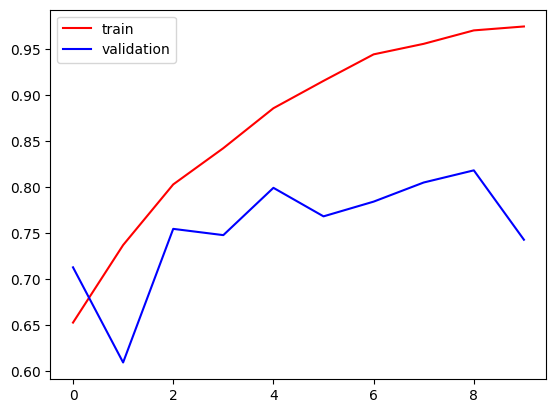

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

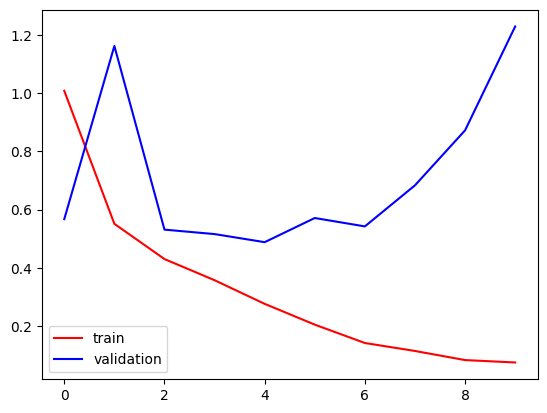

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


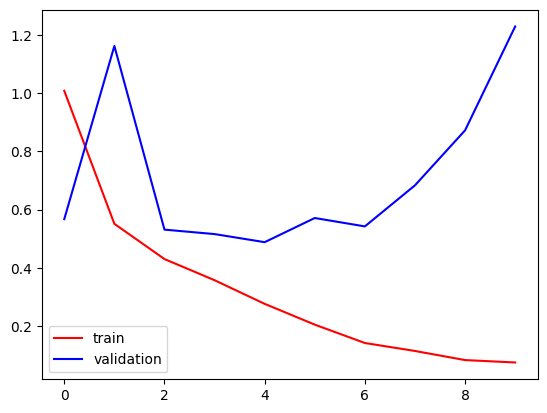

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
import cv2

In [ ]:
test_img =cv2.imread('/content/cat.jpg')

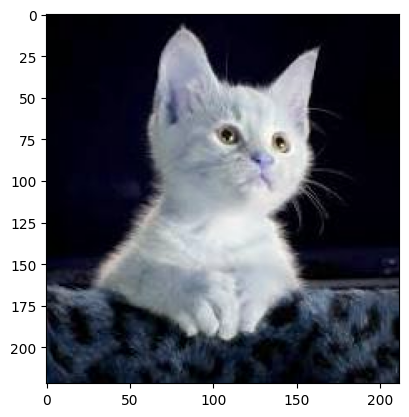

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(222, 212, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


array([[4.4318538e-10]], dtype=float32)